# Assignment 1 : Group 6 
 ##  **TEAM MEMBERS**  
* #### Danae Marais : 578326
* #### Vuyo Fortune Mathe : 578376
* #### Roan Palm : 578632
* #### Henko Meyer : 578420

## Import Libraries

In [24]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import seaborn as sb # visualization
from sklearn.metrics import accuracy_score

# Import Datasets and Load data into Panda Framework

In [25]:
dataset = pd.read_csv('train.csv')

# Exploring the Data and General Information on the Dataset

## Dataset

In [7]:
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

## Check the data types in Dataset

In [8]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Count the number of rows

In [9]:
dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

## Check for duplicate data

In [10]:
dataset.shape #Get the initial size of dataset matrix

(1460, 81)

In [11]:
duplicaterows = dataset[dataset.duplicated()]
print("Number of duplicate rows  :", duplicaterows.shape) #Check for duplicated data rows , [0 indicates no duplicate rows]

Number of duplicate rows  : (0, 81)


# Detect Outliers

## Column Outliers

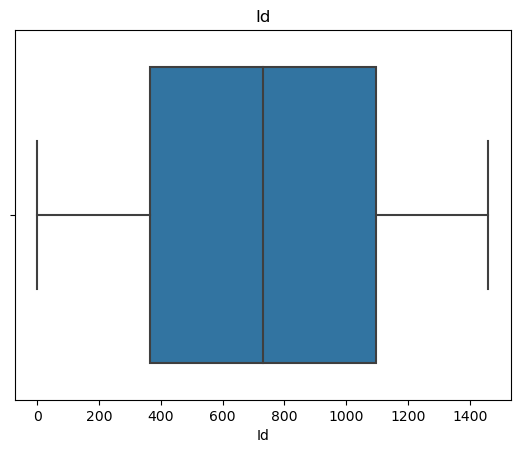

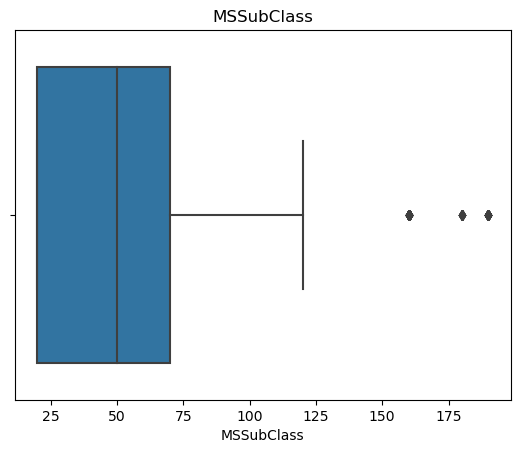

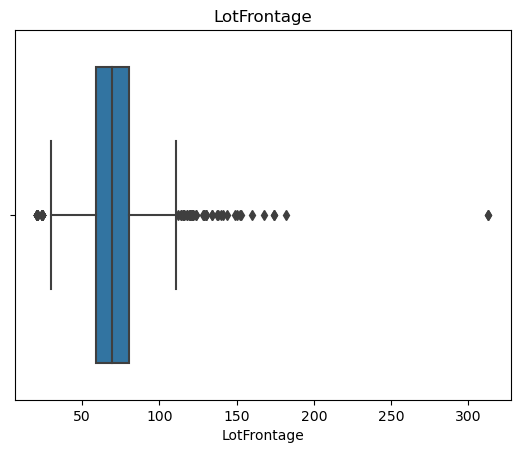

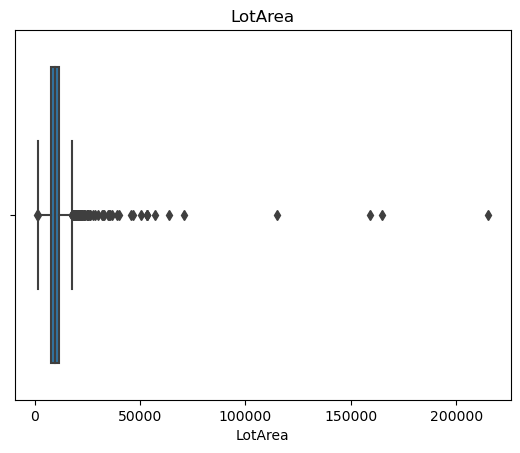

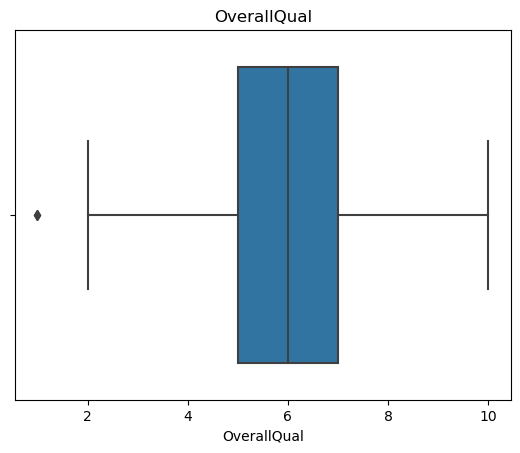

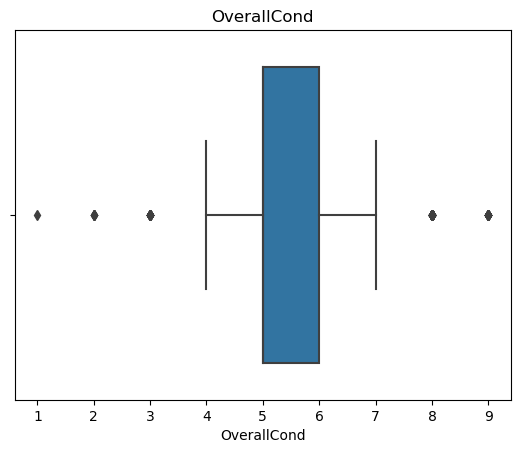

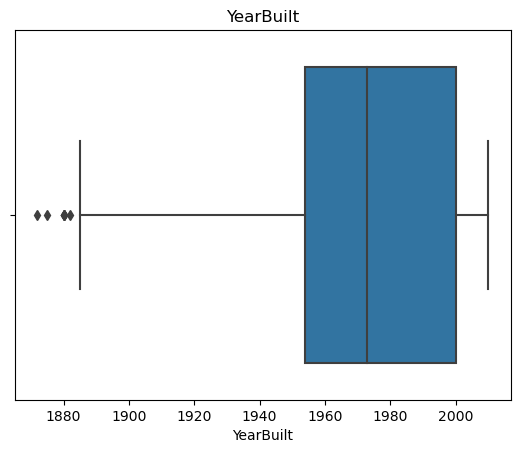

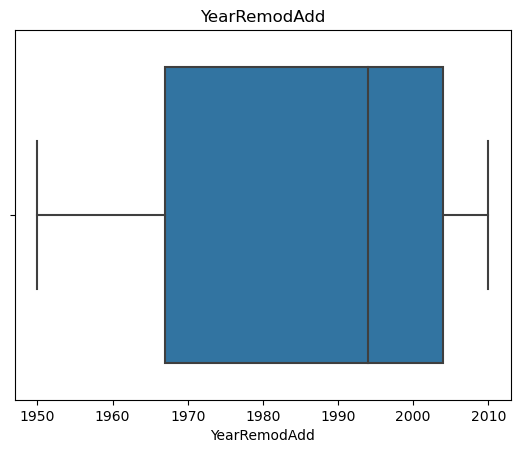

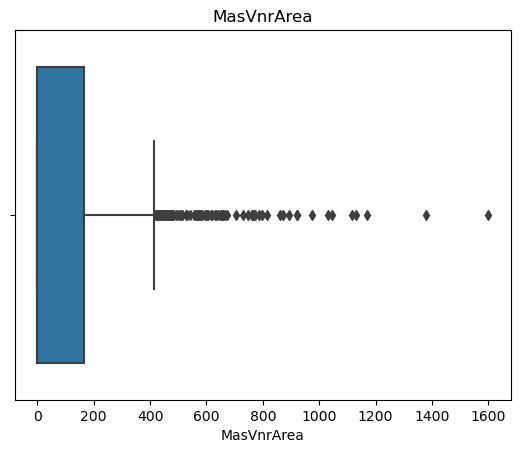

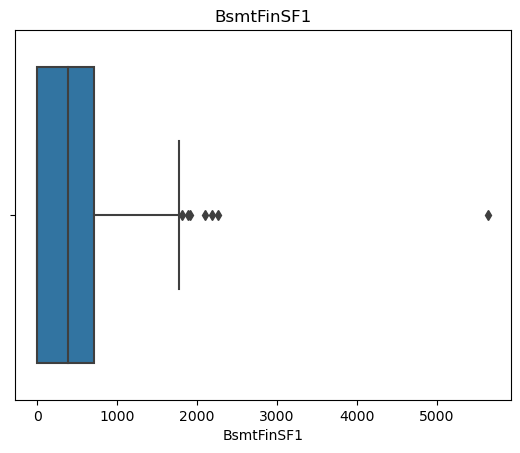

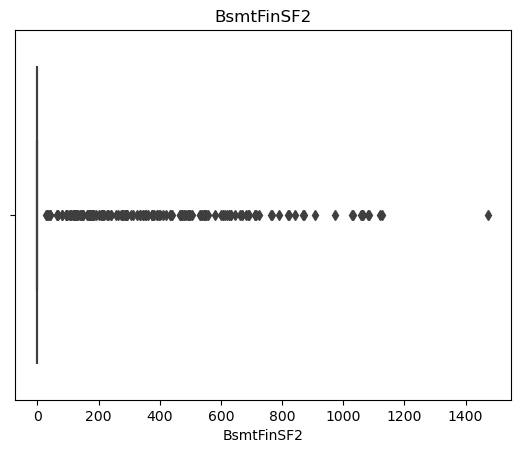

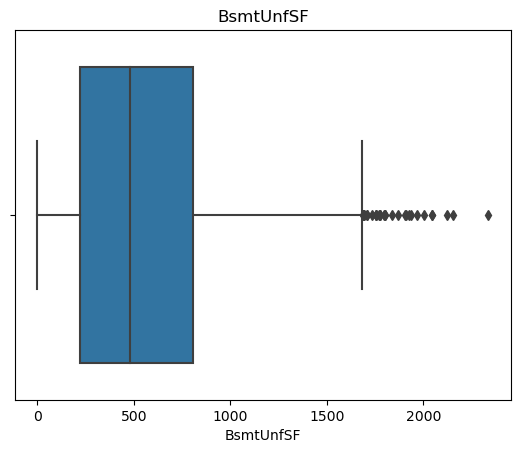

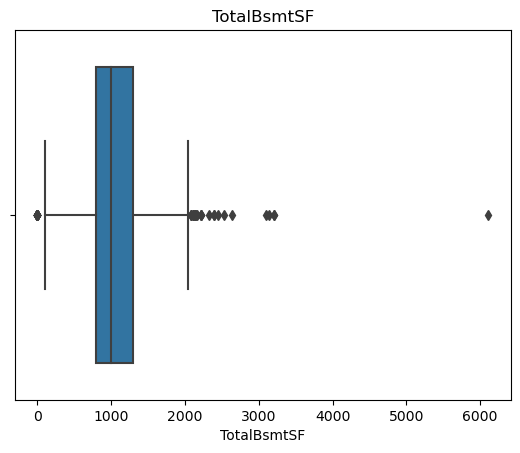

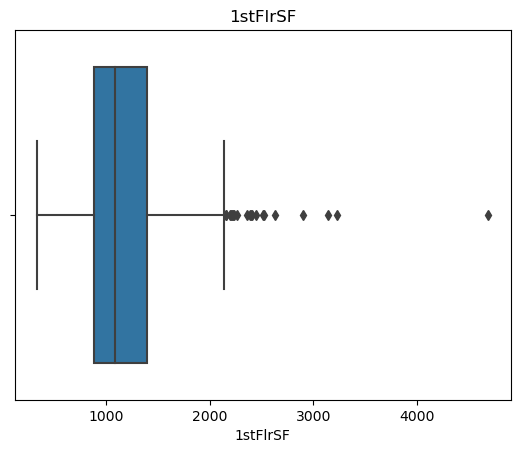

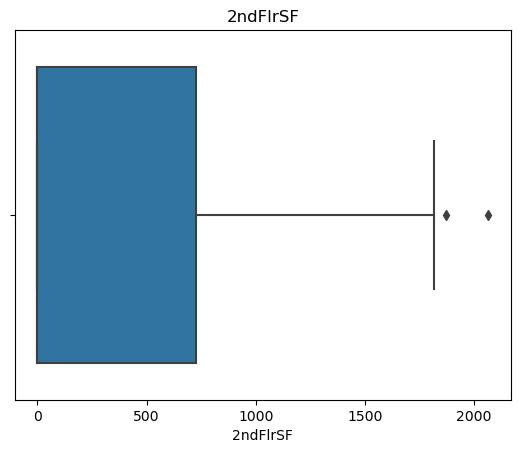

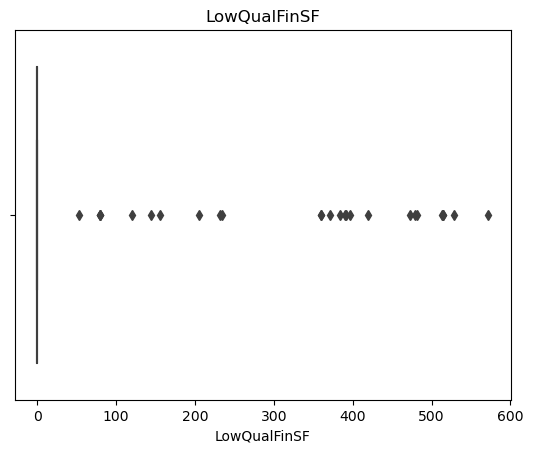

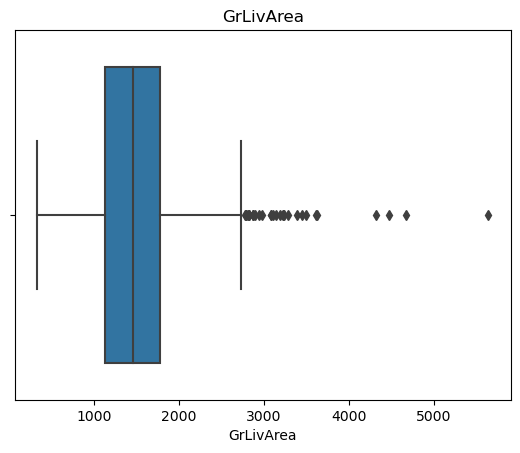

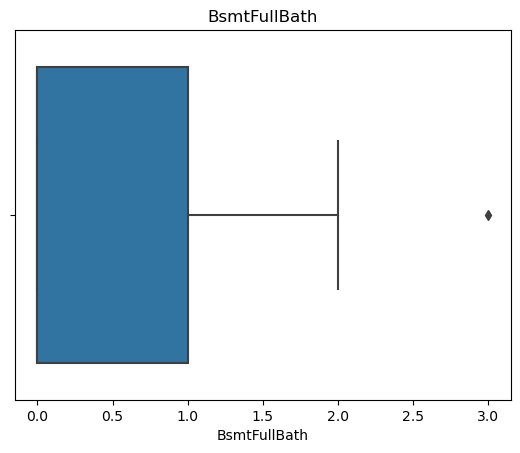

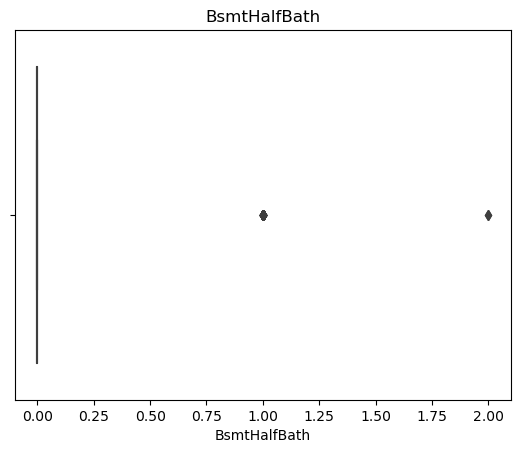

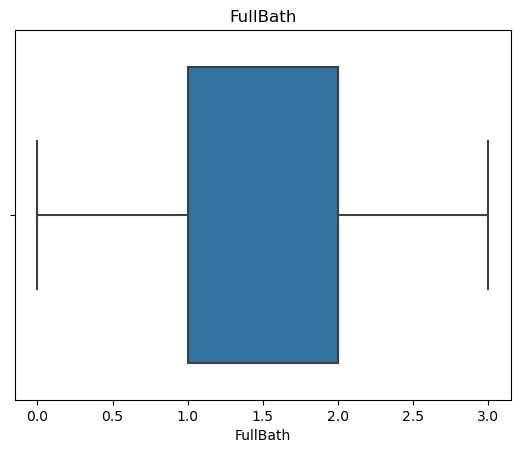

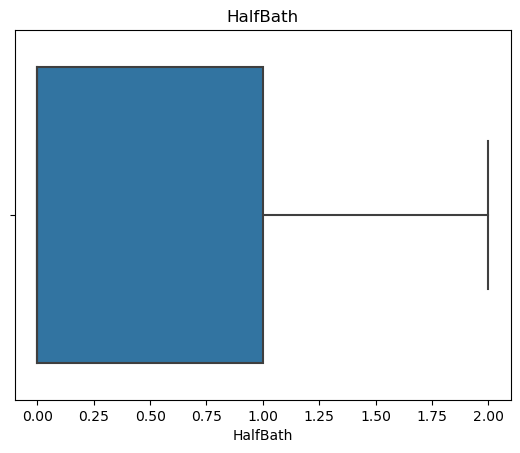

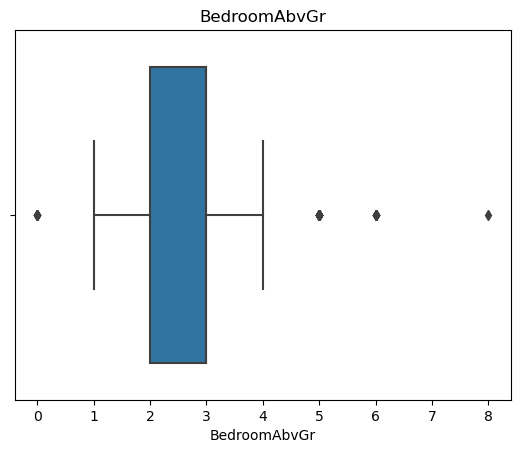

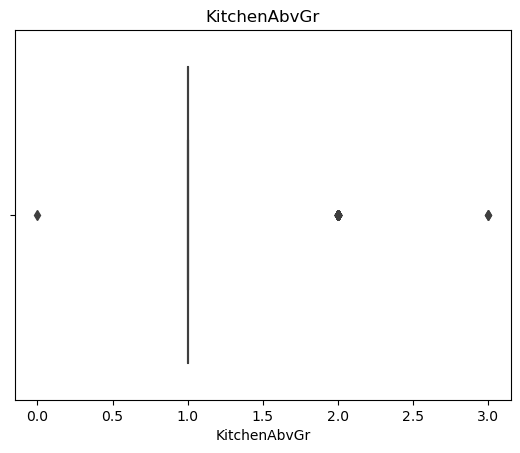

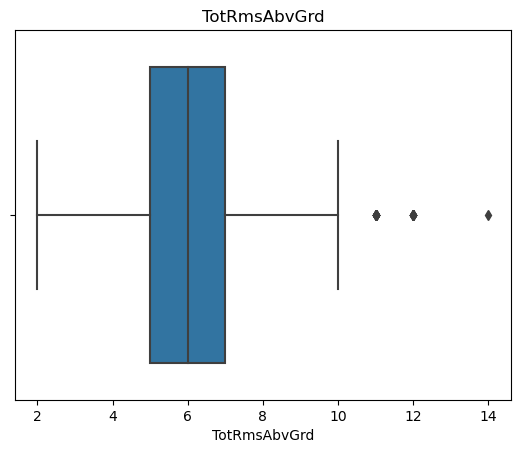

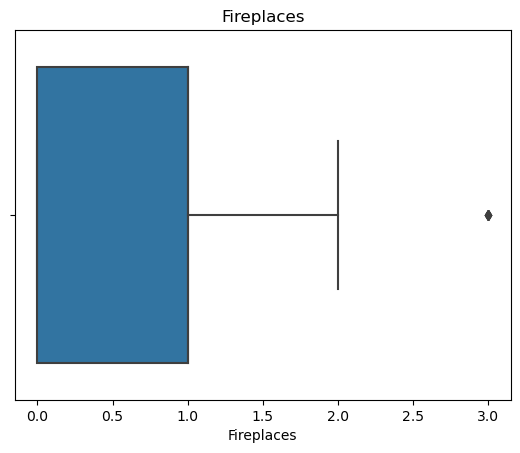

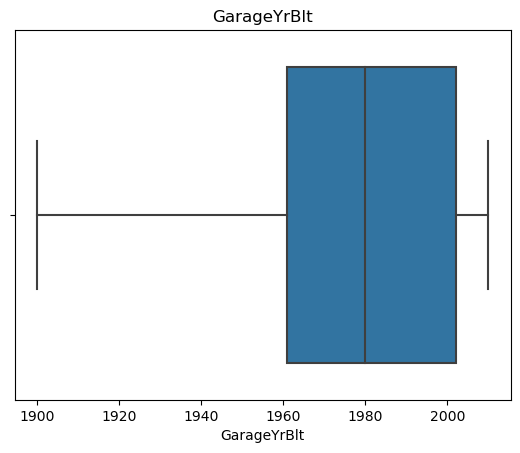

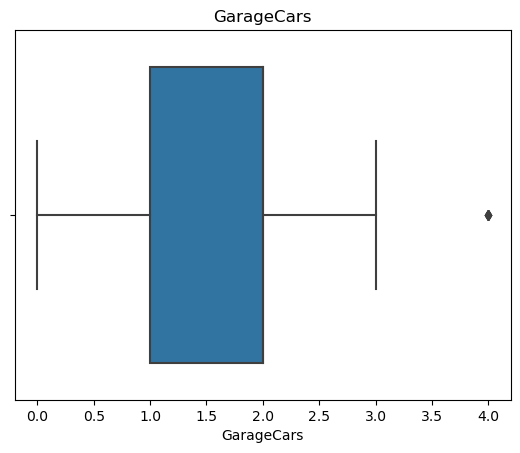

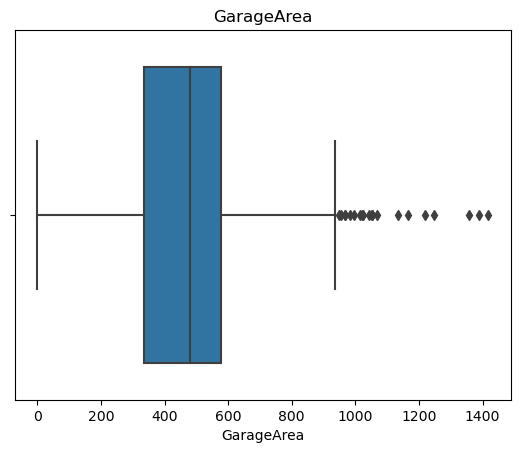

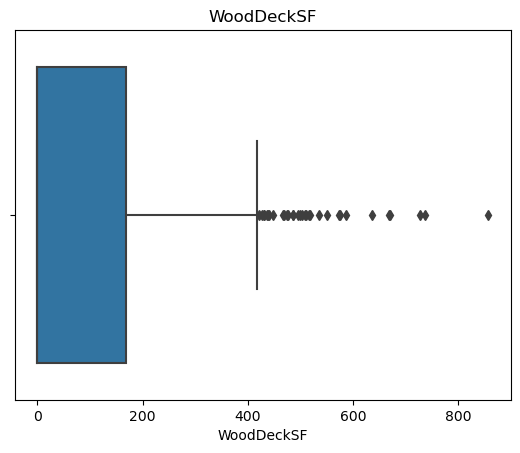

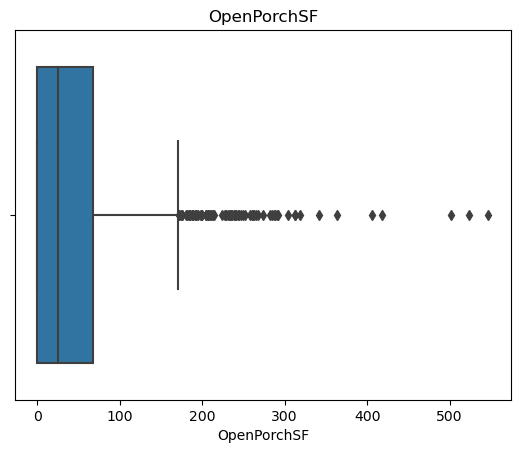

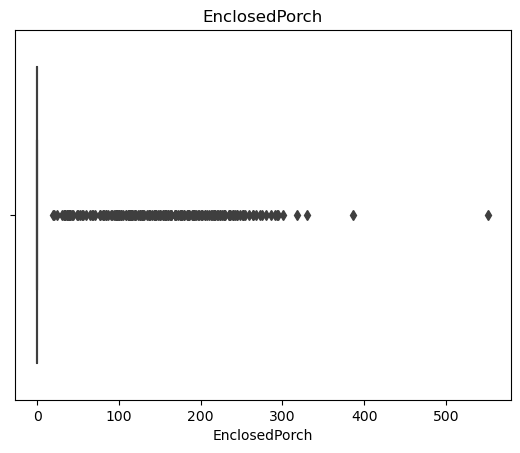

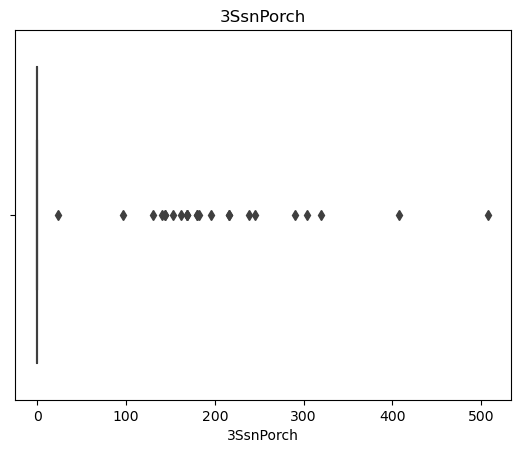

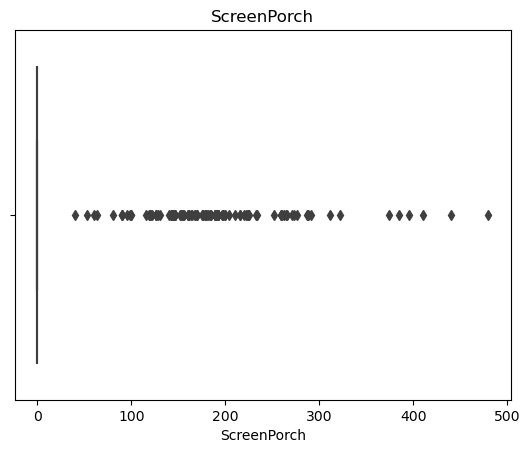

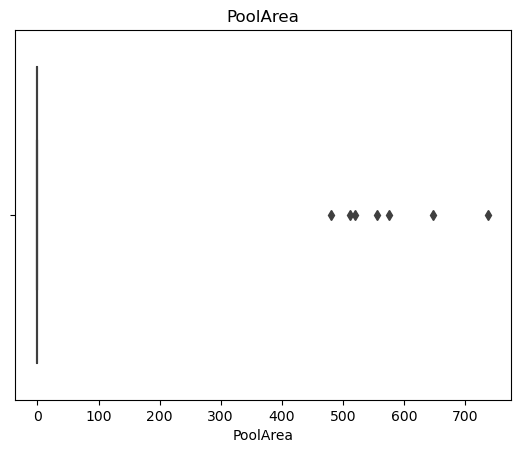

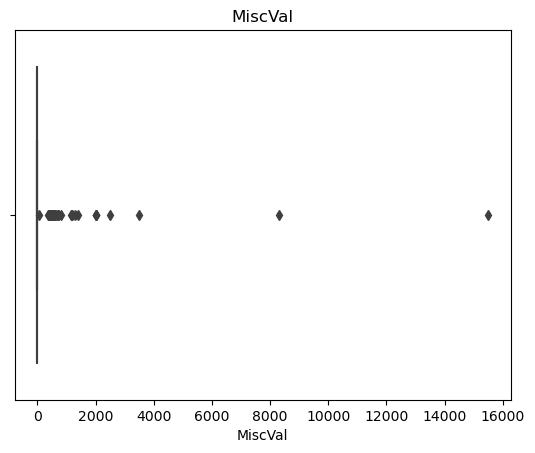

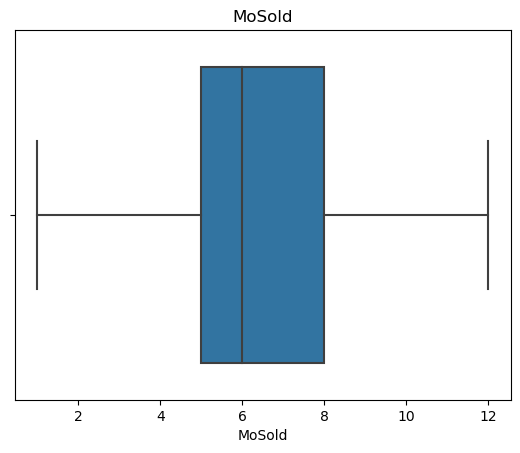

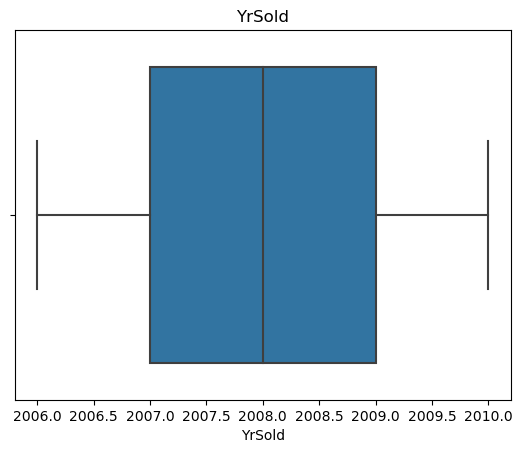

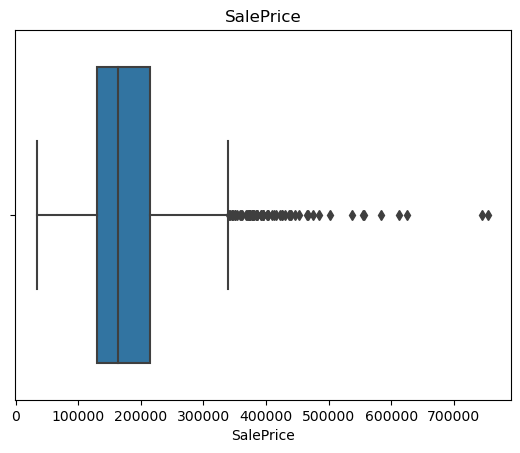

In [13]:
# Plot box plots for all numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure()
    cbrn.boxplot(x=dataset[column])
    plt.title(column)
    plt.show()

In [10]:
outliers = {}
for column in numeric_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (dataset[column] < lower_bound) | (dataset[column] > upper_bound)
    outlier_count = outlier_mask.sum()
    outliers[column] = {'lower_bound': lower_bound,
                        'upper_bound': upper_bound,
                        'outlier_count': outlier_count,
                        'outlier_indices': dataset[outlier_mask].index.tolist()}

# Print the results
for column, outlier_info in outliers.items():
    print(f"{column}: {outlier_info['outlier_count']} outliers found")
    print(f"  Lower Bound: {outlier_info['lower_bound']}, Upper Bound: {outlier_info['upper_bound']}")
    print(f"  Indices: {outlier_info['outlier_indices']}\n")

Id: 0 outliers found
  Lower Bound: -728.5, Upper Bound: 2189.5
  Indices: []

MSSubClass: 103 outliers found
  Lower Bound: -55.0, Upper Bound: 145.0
  Indices: [9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452]

LotFrontage: 88 outliers found
  Lower Bound: 27.5, Upper Bound: 111.5
  Indices: [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276, 277, 290, 302, 306, 313, 363, 429, 430, 432, 434, 446, 489, 500, 504, 523, 599, 614, 649, 655, 662, 675, 758, 807, 825

In [11]:
Q1 = dataset.quantile(0.25,0,True)
Q3 = dataset.quantile(0.75,0,True)
IQR = Q3 - Q1 
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

# Check for Missing Data

## Check for missing values in each column

In [13]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 0       0
1       0
2       0
3     259
4       0
     ... 
76      0
77      0
78      0
79      0
80      0
Length: 81, dtype: int64


## Check Percentage of missing values in each column

In [14]:
missing_values_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_values_percentage)


Percentage of missing values in each column:
 0      0.000000
1      0.000000
2      0.000000
3     17.727584
4      0.000000
        ...    
76     0.000000
77     0.000000
78     0.000000
79     0.000000
80     0.000000
Length: 81, dtype: float64


## Check for rows with missing values

In [15]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nRows with missing values:\n", rows_with_missing_values)


Rows with missing values:
         0   1   2   3      4     5    6    7    8       9   ... 71   72  \
1        1  60  RL  65   8450  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
2        2  20  RL  80   9600  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
3        3  60  RL  68  11250  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
4        4  70  RL  60   9550  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
5        5  60  RL  84  14260  Pave  NaN  IR1  Lvl  AllPub  ...  0  NaN   
...    ...  ..  ..  ..    ...   ...  ...  ...  ...     ...  ... ..  ...   
1456  1456  60  RL  62   7917  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1457  1457  20  RL  85  13175  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1458  1458  70  RL  66   9042  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1459  1459  20  RL  68   9717  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   
1460  1460  20  RL  75   9937  Pave  NaN  Reg  Lvl  AllPub  ...  0  NaN   

         73    74    75  76    77  78       79      80  
1       NaN   

In [16]:
print(dataset.isnull().sum()) # Check for missing Data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Import Data for Data Preperation

In [15]:
#dataset

## Get Columns that is of type object

In [16]:
non_numeric_cols = dataset.select_dtypes(exclude=["int","float"]).columns

non_numeric_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Encode Variables

In [17]:
le = LabelEncoder()

for col in dataset.columns:
        if dataset[col].dtype == object:
            dataset[col] = le.fit_transform(dataset[col]) 

In [20]:
#dataset

## Show Columns with Null Values

In [21]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [ ]:
for col in Dataset.columns:
        Dataset[col] = Dataset[col].fillna(0)

# Numerical Variable scaling using Standardization 

## Identify the numeric columns

In [23]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Scale the numeric columns

### Initialize the Standard Scaler

In [26]:
scaler = StandardScaler()

### Fit the scaler on the numeric columns

In [27]:
standardized = dataset.copy()
standardized[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])

print("Standardized data:")
print(standardized.head())

Standardized data:
         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0 -1.730865    0.073375       RL    -0.208034 -0.207142   Pave   NaN      Reg   
1 -1.728492   -0.872563       RL     0.409895 -0.091886   Pave   NaN      Reg   
2 -1.726120    0.073375       RL    -0.084449  0.073480   Pave   NaN      IR1   
3 -1.723747    0.309859       RL    -0.414011 -0.096897   Pave   NaN      IR1   
4 -1.721374    0.073375       RL     0.574676  0.375148   Pave   NaN      IR1   

  LandContour Utilities  ...  PoolArea PoolQC Fence MiscFeature   MiscVal  \
0         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
1         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
2         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
3         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   
4         Lvl    AllPub  ... -0.068692    NaN   NaN         NaN -0.087688   

     MoSold    YrSold  SaleType

In [29]:
#Feature Engineering
dataset["No_Parking_spots"] = np.floor(dataset["GarageArea"] /dataset["GarageCars"])
dataset["Total_house_Area"] = dataset["1stFlrSF"]+ dataset["2ndFlrSF"]
dataset["House_Age"] = dataset["YrSold"] - dataset["YearBuilt"]
dataset["Year_Last_Upgrade"] = dataset["YrSold"] - dataset["YearRemodAdd"]


In [2]:
# pd.options.display.max_columns = 9999
# pd.options.display.max_rows = 9999
dataset.drop(['GarageArea'], axis =1 , inplace=True )
dataset.drop(["GarageCars"], axis =1 , inplace=True )
dataset.drop(["1stFlrSF"], axis =1 , inplace=True )
dataset.drop(["2ndFlrSF"], axis =1 , inplace=True )
dataset.drop(["YrSold"], axis =1 , inplace=True )
dataset.drop( ["YearRemodAdd"], axis =1 , inplace=True )




NameError: name 'Dataset' is not defined

In [31]:
dataset1.to_csv("new_train.csv", index=False)

In [ ]:
dataset1 = pd.read_csv('new_train.csv')

# Split the data into training and test Data

In [33]:
x = dataset1.drop(['SalePrice'],axis = 1)
y = dataset1['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
x_train.isnull().sum().sum()

0

In [35]:
y_train.isnull().sum().sum()

0

## Regression Model

In [36]:


forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
forest.score(x_test,y_test)

0.8875602567692409

In [38]:
#Grid Search with cross validation to improve the accuracy


forest= RandomForestRegressor()
para_grid ={
    "n_estimators" : [100, 200, 300],
    "min_samples_split": [2,4,6,8],
    "max_depth":[None, 4, 8]
}

grid_search= GridSearchCV(forest , para_grid, cv=5 ,
                          scoring = "neg_mean_squared_error",
                         return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest = grid_search.best_estimator_

In [40]:
best_forest.score(x_test , y_test)

0.8855230238634435

# Results Communication

In [ ]:


# Load the dataset
df = pd.read_csv('new_train.csv')

# Choose the features you want to plot
x = 'YearBuilt'
y = 'SalePrice'

# Create the scatter plot
plt.scatter(df[x], df[y], alpha=0.5, label='Yearbuilt with saleprice')

# Add labels and title
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot of {x} vs {y}')

plt.legend()

# Show the plot
plt.show()

# Feature Selection techniques

## Recursive Feature Elmination

### Import libraries and assign CSV

### Perform Recursive Feature Elimination

In [ ]:
rfe = RFE(estimator=rf_classifier, n_features_to_select=79, step=1) 
rfe.fit(X_train, y_train)

### Get Selected Features

In [ ]:
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

### Fit the classifiers

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_classifier.fit(X_train_selected, y_train)

### Evaluate the model

In [ ]:
y_pred = rf_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))